<a href="https://colab.research.google.com/github/fxrdhan/Machine-Learning-Project/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Firdaus_Arif_Ramadhani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Dataset Introduction**

**Air Quality Measurements Dataset**

1.  Description

    This dataset contains detailed air quality measurements collected over a specified period. It focuses on various pollutants, providing a comprehensive overview of air quality metrics.

2. Feature	Description

  - Date: The date of the measurement.
  - Time: The time of the measurement.
  - CO(GT): Concentration of carbon monoxide (CO) in the air (µg/m³).
  - PT08.S1(CO):	Sensor measurement for CO concentration.
  - NMHC(GT):	Concentration of non-methane hydrocarbons (NMHC) (µg/m³).
  - C6H6(GT):	Concentration of benzene (C6H6) in the air (µg/m³).
  - PT08.S2(NMHC):	Sensor measurement for NMHC concentration.
  - NOx(GT):	Concentration of nitrogen oxides (NOx) in the air (µg/m³).
  - PT08.S3(NOx):	Sensor measurement for NOx concentration.
  - NO2(GT):	Concentration of nitrogen dioxide (NO2) in the air (µg/m³).

3. Total Rows: 9357
4. Source: [Kaggle](https://www.kaggle.com/datasets/dakshbhalala/uci-air-quality-dataset/data)

# **2. Import Library**

In [1218]:
!python --version

Python 3.10.12


In [1219]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn yellowbrick scipy

In [1220]:
# System and Settings
import time
import warnings
warnings.filterwarnings('ignore')

# Core Data Processing Libraries
import numpy as np
import pandas as pd
# Configure pandas display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning
## Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

## Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## Dimensionality Reduction
from sklearn.decomposition import PCA

## Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Statistical Analysis
from scipy import stats
from scipy.stats.mstats import winsorize
from scipy.spatial.distance import cdist

# **3. Import Dataset**

In [1221]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1222]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AirQualityUCI.csv")

In [1223]:
df

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     3/10/2004  18:00:00   2.600     1360.000   150.000    11.900   
1     3/10/2004  19:00:00   2.000     1292.000   112.000     9.400   
2     3/10/2004  20:00:00   2.200     1402.000    88.000     9.000   
3     3/10/2004  21:00:00   2.200     1376.000    80.000     9.200   
4     3/10/2004  22:00:00   1.600     1272.000    51.000     6.500   
...         ...       ...     ...          ...       ...       ...   
9466        NaN       NaN     NaN          NaN       NaN       NaN   
9467        NaN       NaN     NaN          NaN       NaN       NaN   
9468        NaN       NaN     NaN          NaN       NaN       NaN   
9469        NaN       NaN     NaN          NaN       NaN       NaN   
9470        NaN       NaN     NaN          NaN       NaN       NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0          1046.000  166.000      1056.000  113.000      1692.000   
1           955.000  103.000      1174.000   92.000      1559.000   
2           939.000  131.000      1140.000  114.000      1555.000   
3           948.000  172.000      1092.000  122.000      1584.000   
4           836.000  131.000      1205.000  116.000      1490.000   
...             ...      ...           ...      ...           ...   
9466            NaN      NaN           NaN      NaN           NaN   
9467            NaN      NaN           NaN      NaN           NaN   
9468            NaN      NaN           NaN      NaN           NaN   
9469            NaN      NaN           NaN      NaN           NaN   
9470            NaN      NaN           NaN      NaN           NaN   

      PT08.S5(O3)      T     RH    AH  Unnamed: 15  Unnamed: 16  
0        1268.000 13.600 48.900 0.758          NaN          NaN  
1         972.000 13.300 47.700 0.726          NaN          NaN  
2        1074.000 11.900 54.000 0.750          NaN          NaN  
3        1203.000 11.000 60.000 0.787          NaN          NaN  
4        1110.000 11.200 59.600 0.789          NaN          NaN  
...           ...    ...    ...   ...          ...          ...  
9466          NaN    NaN    NaN   NaN          NaN          NaN  
9467          NaN    NaN    NaN   NaN          NaN          NaN  
9468          NaN    NaN    NaN   NaN          NaN          NaN  
9469          NaN    NaN    NaN   NaN          NaN          NaN  
9470          NaN    NaN    NaN   NaN          NaN          NaN  

[9471 rows x 17 columns]

# **4. Exploratory Data Analysis (EDA)**

In [1224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [1225]:
df.sample(5)

Date      Time   CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
6610  12/11/2004   4:00:00    0.800      834.000  -200.000     2.700   
3913   8/20/2004  19:00:00 -200.000      984.000  -200.000     5.700   
5462  10/24/2004   8:00:00    0.900      920.000  -200.000     4.800   
2191   6/10/2004   1:00:00    0.700      878.000  -200.000     5.200   
1538   5/13/2004  20:00:00    4.600     1428.000  -200.000    21.200   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
6610        632.000  111.000      1102.000   83.000       871.000   
3913        800.000 -200.000       836.000 -200.000      1607.000   
5462        755.000  108.000       853.000   45.000      1359.000   
2191        774.000   27.000      1065.000   42.000      1527.000   
1538       1329.000  250.000       594.000  141.000      2102.000   

      PT08.S5(O3)      T     RH    AH  Unnamed: 15  Unnamed: 16  
6610      746.000 11.500 34.200 0.462          NaN          NaN  
3913      610.000 30.800 43.100 1.876          NaN          NaN  
5462      880.000 20.000 66.700 1.540          NaN          NaN  
2191      552.000 23.900 45.600 1.333          NaN          NaN  
1538     1602.000 19.100 52.300 1.149          NaN          NaN

In [1226]:
df.describe()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
count 9357.000     9357.000  9357.000  9357.000       9357.000 9357.000   
mean   -34.208     1048.990  -159.090     1.866        894.595  168.617   
std     77.657      329.833   139.789    41.380        342.333  257.434   
min   -200.000     -200.000  -200.000  -200.000       -200.000 -200.000   
25%      0.600      921.000  -200.000     4.000        711.000   50.000   
50%      1.500     1053.000  -200.000     7.900        895.000  141.000   
75%      2.600     1221.000  -200.000    13.600       1105.000  284.000   
max     11.900     2040.000  1189.000    63.700       2214.000 1479.000   

       PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)        T       RH  \
count      9357.000 9357.000      9357.000     9357.000 9357.000 9357.000   
mean        794.990   58.149      1391.480      975.072    9.778   39.485   
std         321.994  126.940       467.210      456.938   43.204   51.216   
min        -200.000 -200.000      -200.000     -200.000 -200.000 -200.000   
25%         637.000   53.000      1185.000      700.000   10.900   34.100   
50%         794.000   96.000      1446.000      942.000   17.200   48.600   
75%         960.000  133.000      1662.000     1255.000   24.100   61.900   
max        2683.000  340.000      2775.000     2523.000   44.600   88.700   

            AH  Unnamed: 15  Unnamed: 16  
count 9357.000        0.000        0.000  
mean    -6.838          NaN          NaN  
std     38.977          NaN          NaN  
min   -200.000          NaN          NaN  
25%      0.692          NaN          NaN  
50%      0.977          NaN          NaN  
75%      1.296          NaN          NaN  
max      2.231          NaN          NaN

In [1227]:
# Remove Missing Attribute Values (-200)
df = df[(df[['CO(GT)', 'C6H6(GT)', 'NO2(GT)', 'T', 'RH']] != -200).all(axis=1)]

In [1228]:
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      7055
Unnamed: 16      7055
dtype: int64

In [1229]:
df.duplicated().sum()

113

In [1230]:
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

In [1231]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.columns.tolist()

['CO(GT)',
 'PT08.S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

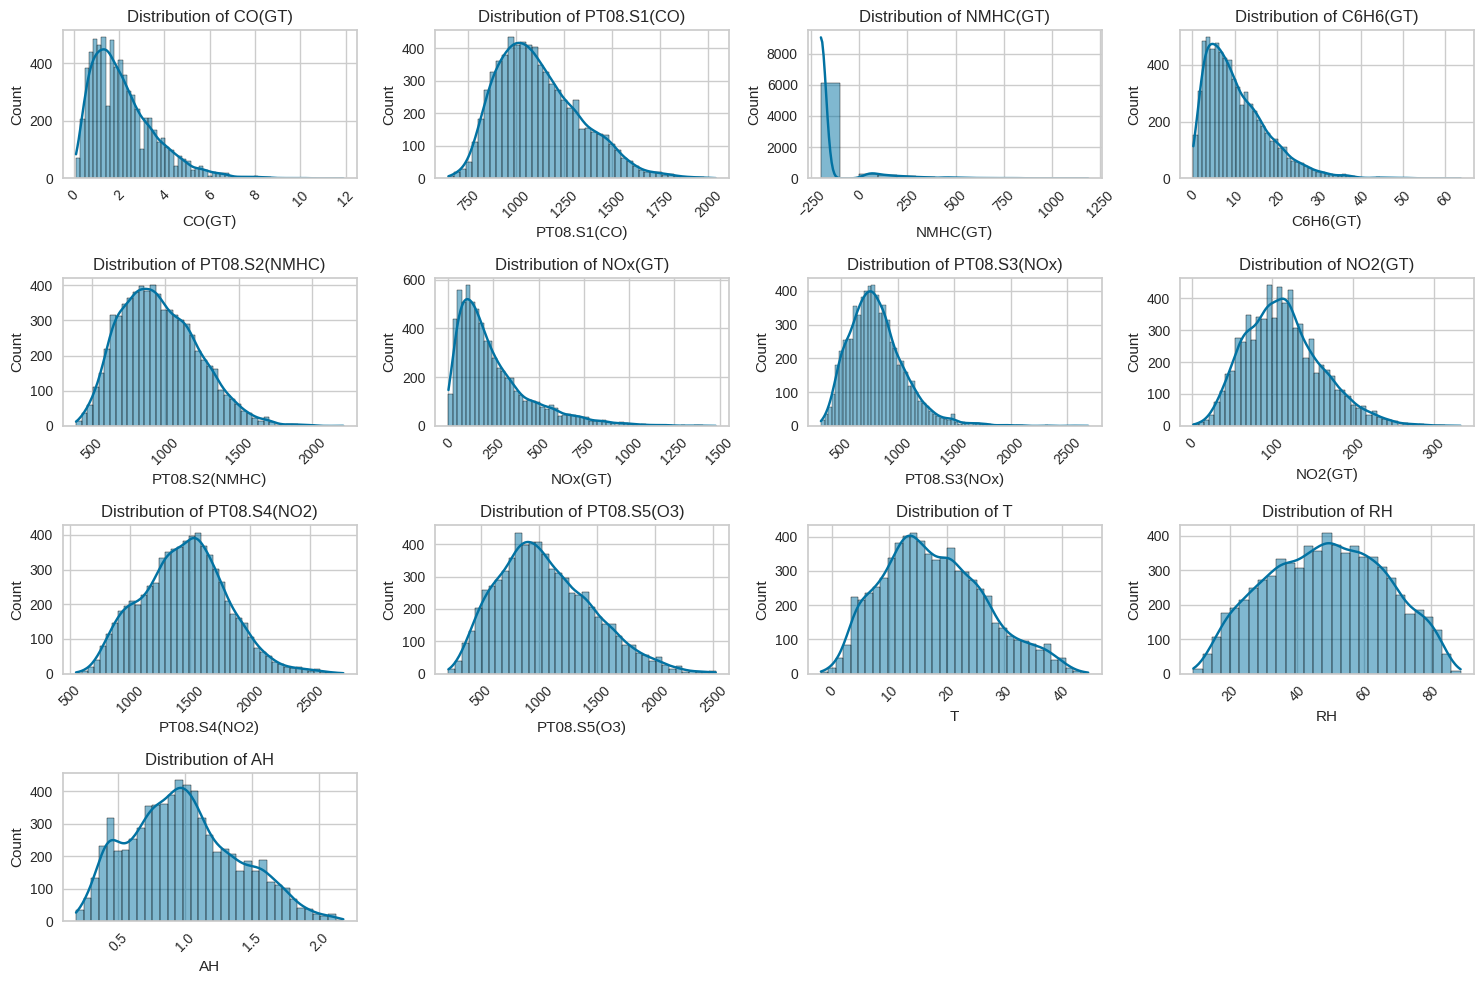

In [1232]:
numeric_columns = df.select_dtypes(include=['float64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- Most features show a right-skewed distribution.
- Some features, such as NMHC(GT), have significant zero or near-zero values, which indicate missing or censored data encoded as zero.
- Features like T (Temperature), RH (Relative Humidity), and AH (Absolute Humidity) show a more symmetric distribution.

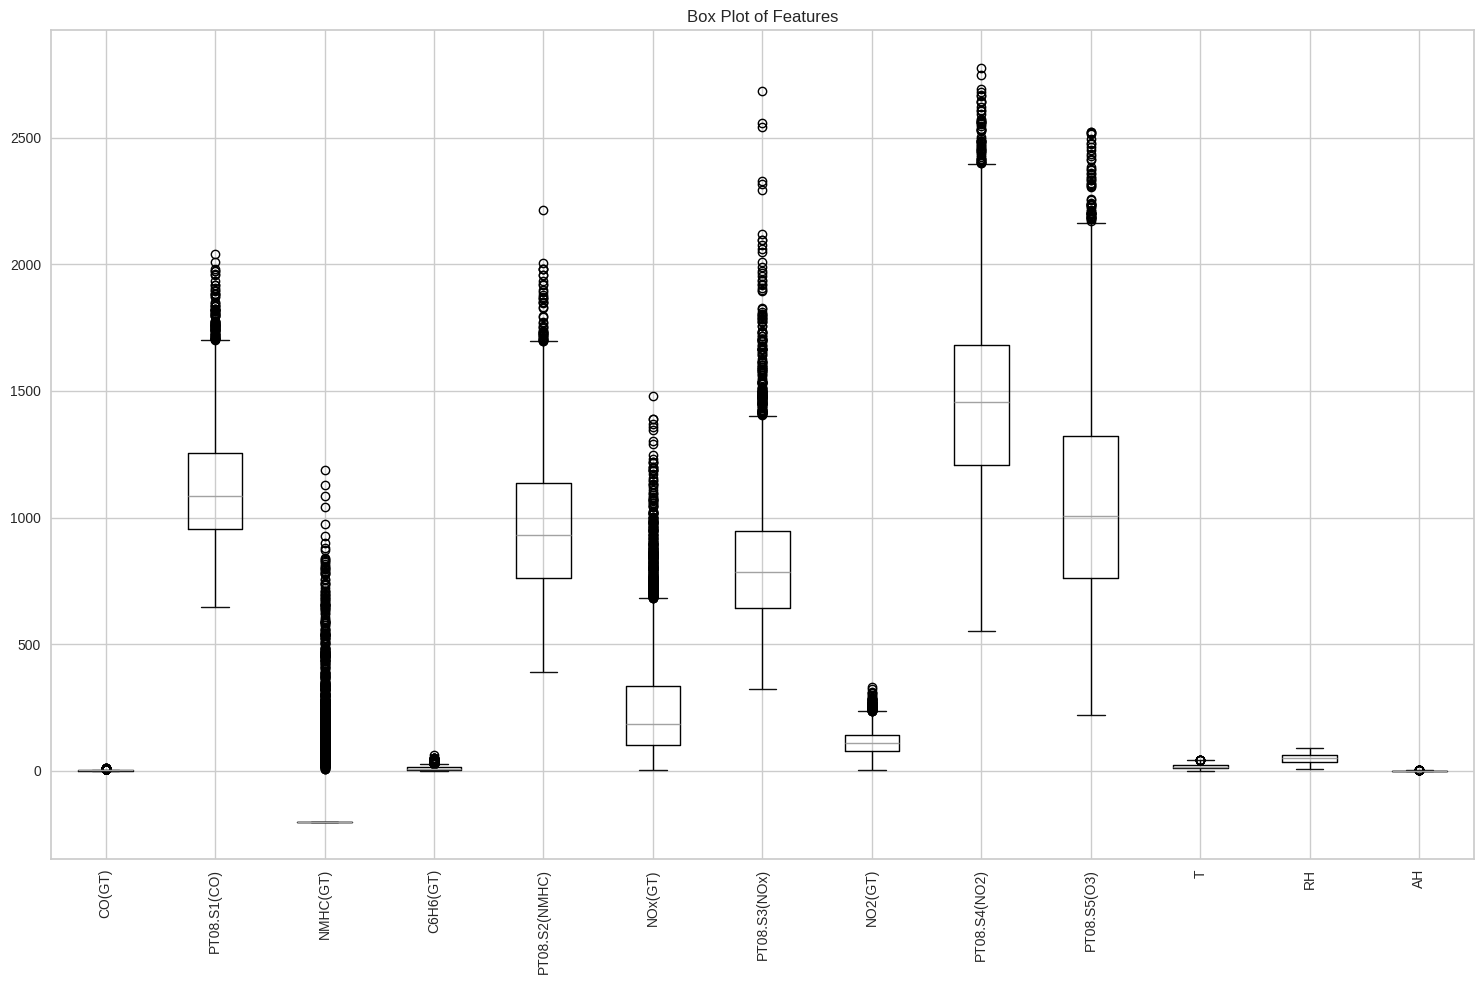

In [1233]:
plt.figure(figsize=(15, 10))
df.boxplot()
plt.xticks(rotation=90)
plt.title('Box Plot of Features')
plt.tight_layout()
plt.show()

**Insight:**
- Several features, such as NMHC(GT) and NOx(GT), have significant outliers that are far from the interquartile range (IQR).
- Features like C6H6(GT) and CO(GT) have a wide spread, indicating substantial variability in the data.

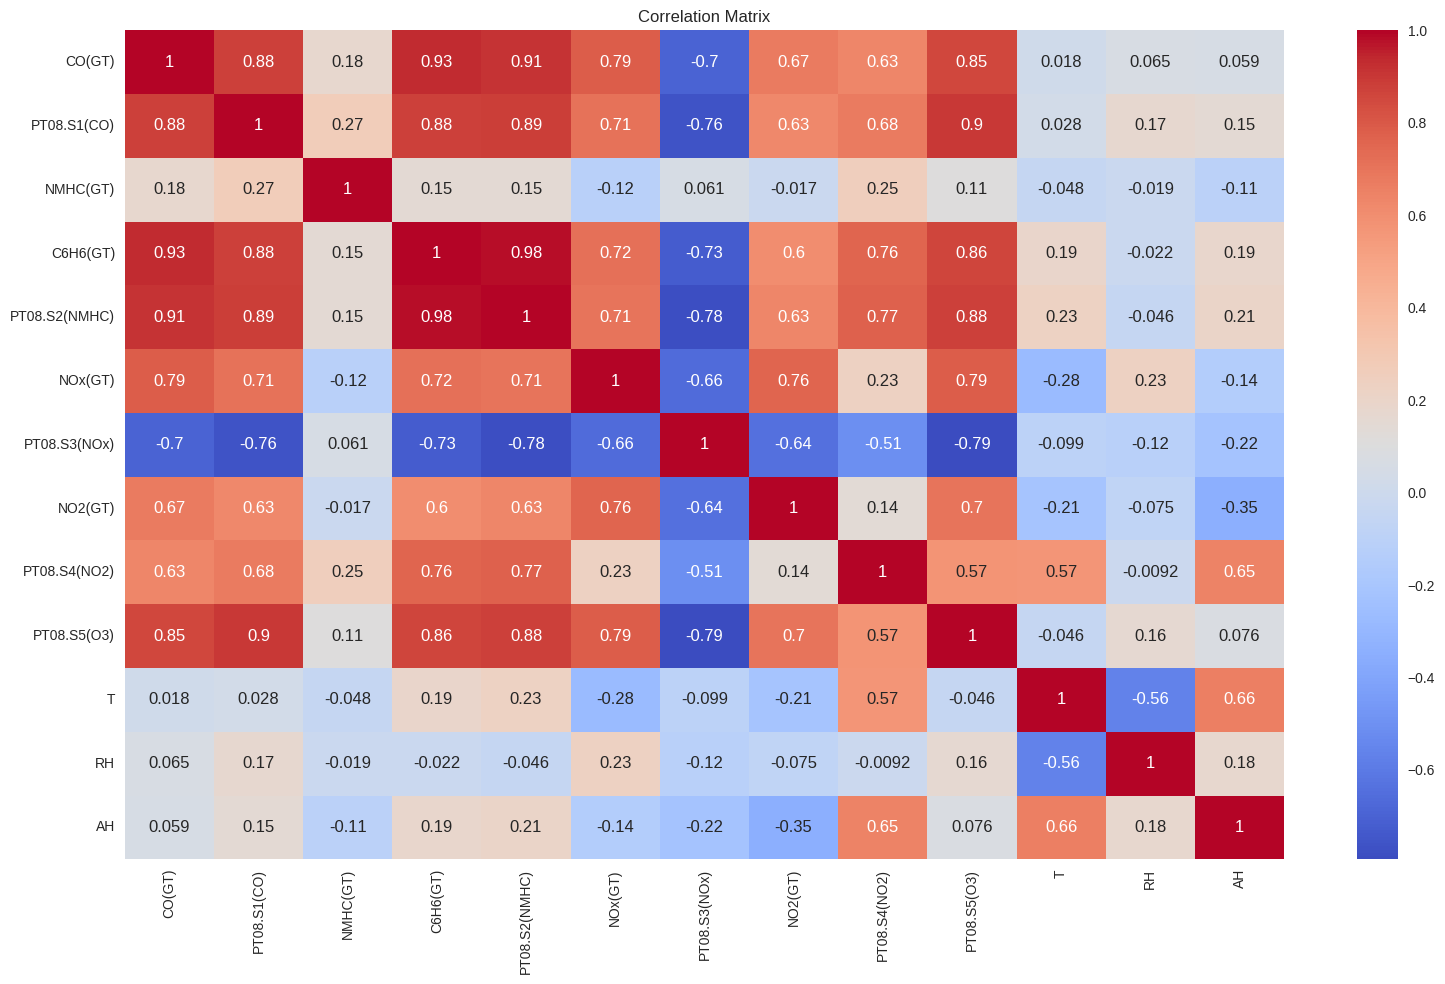

In [1234]:
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

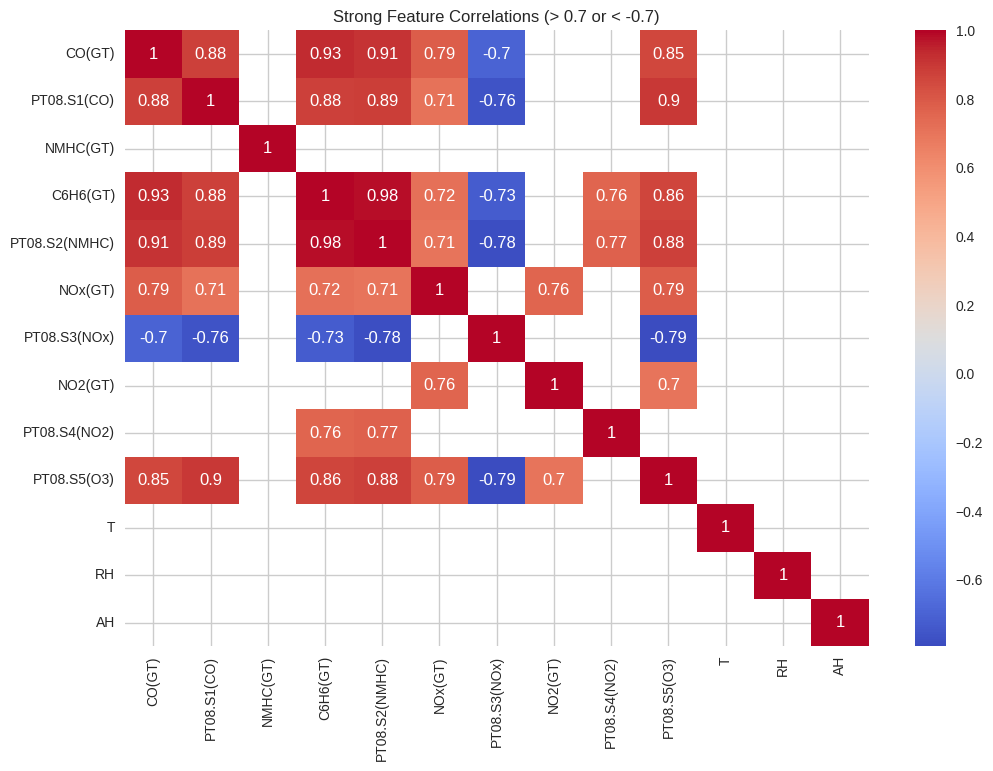

In [1235]:
# Filter for strong correlations
correlation_matrix = numeric_df.corr()
strong_corr = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]

plt.figure(figsize=(12, 8))
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', cbar=True)
plt.title('Strong Feature Correlations (> 0.7 or < -0.7)')
plt.show()

**Insight:**
- Strong positive correlations exist between:
  - C6H6(GT) and PT08.S2(NMHC) (0.98)
  - CO(GT) and C6H6(GT) (0.93)
  - PT08.S4(NO2) and PT08.S5(O3) (0.88)
- Negative correlations include:
  - PT08.S3(NOx) and PT08.S4(NO2) (-0.79)

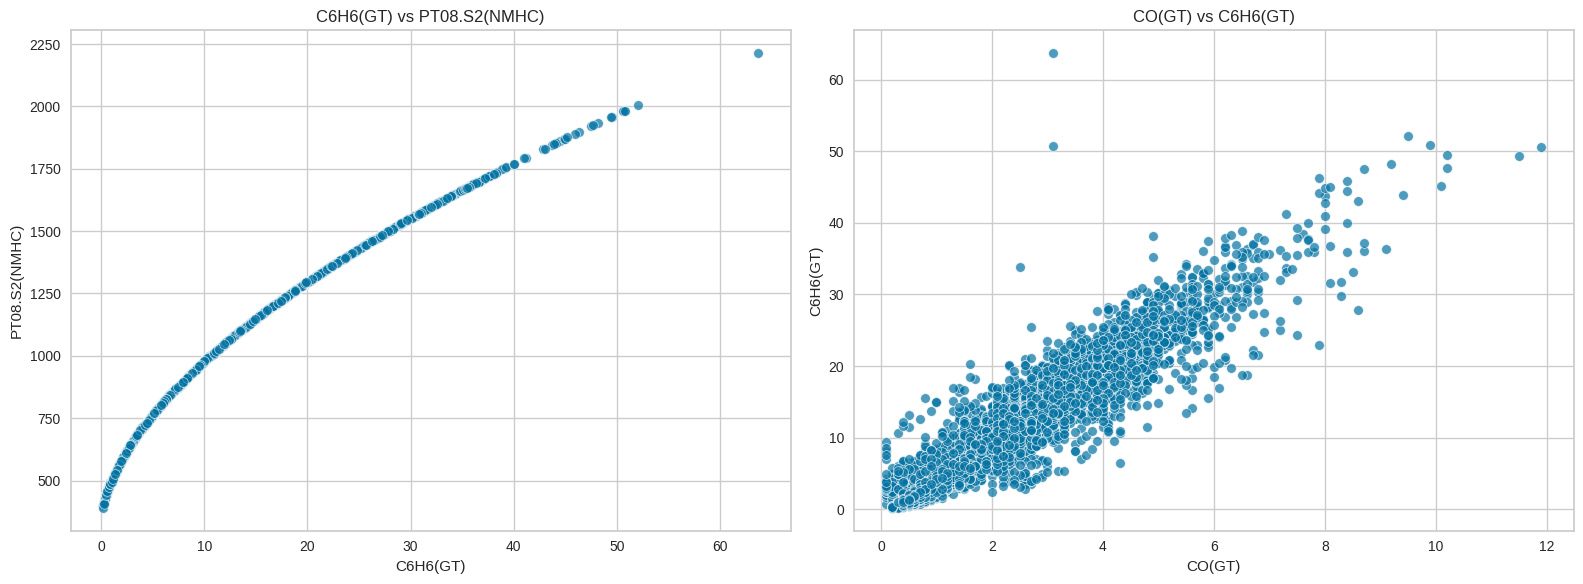

In [1236]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# C6H6(GT) vs PT08.S2(NMHC)
sns.scatterplot(ax=axes[0], x='C6H6(GT)', y='PT08.S2(NMHC)', data=df, alpha=0.7)
axes[0].set_title('C6H6(GT) vs PT08.S2(NMHC)')
axes[0].set_xlabel('C6H6(GT)')
axes[0].set_ylabel('PT08.S2(NMHC)')

# CO(GT) vs C6H6(GT)
sns.scatterplot(ax=axes[1], x='CO(GT)', y='C6H6(GT)', data=df, alpha=0.7)
axes[1].set_title('CO(GT) vs C6H6(GT)')
axes[1].set_xlabel('CO(GT)')
axes[1].set_ylabel('C6H6(GT)')

plt.tight_layout()
plt.show()

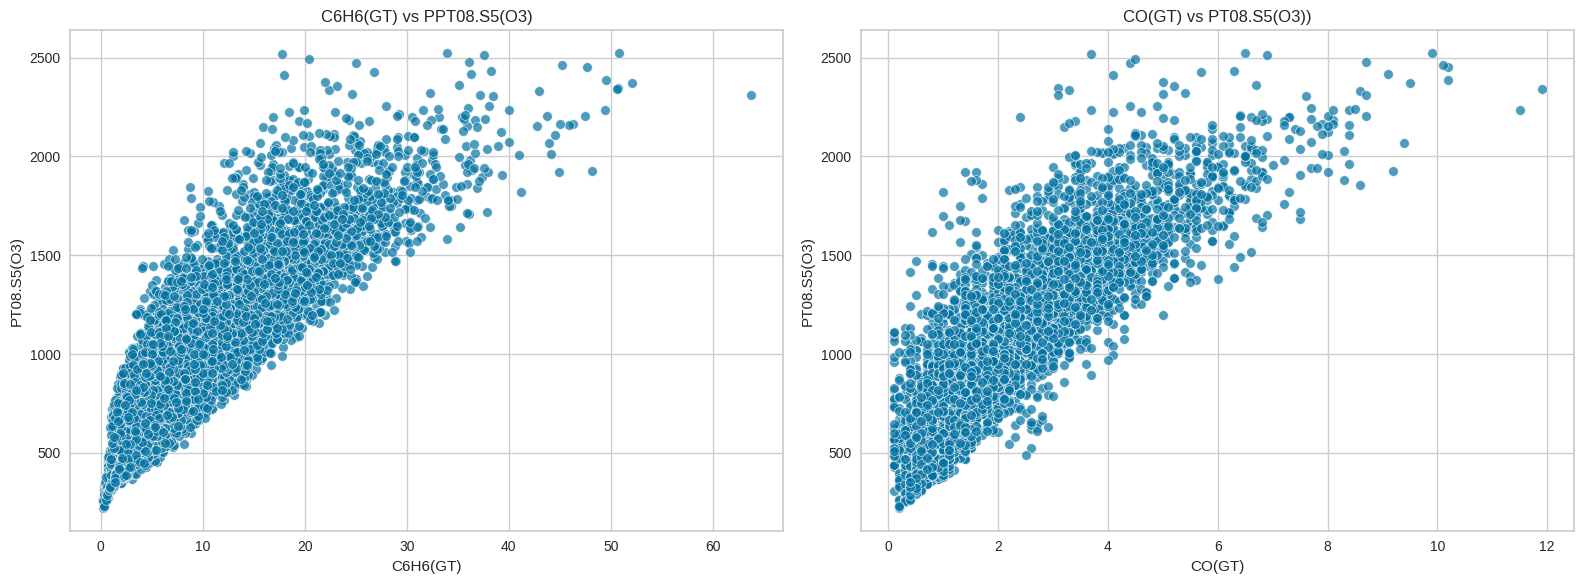

In [1237]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# C6H6(GT) vs PT08.S5(O3)
sns.scatterplot(ax=axes[0], x='C6H6(GT)', y='PT08.S5(O3)', data=df, alpha=0.7)
axes[0].set_title('C6H6(GT) vs PPT08.S5(O3)')
axes[0].set_xlabel('C6H6(GT)')
axes[0].set_ylabel('PT08.S5(O3)')

# CO(GT) vs PT08.S5(O3)
sns.scatterplot(ax=axes[1], x='CO(GT)', y='PT08.S5(O3)', data=df, alpha=0.7)
axes[1].set_title('CO(GT) vs PT08.S5(O3))')
axes[1].set_xlabel('CO(GT)')
axes[1].set_ylabel('PT08.S5(O3)')

plt.tight_layout()
plt.show()

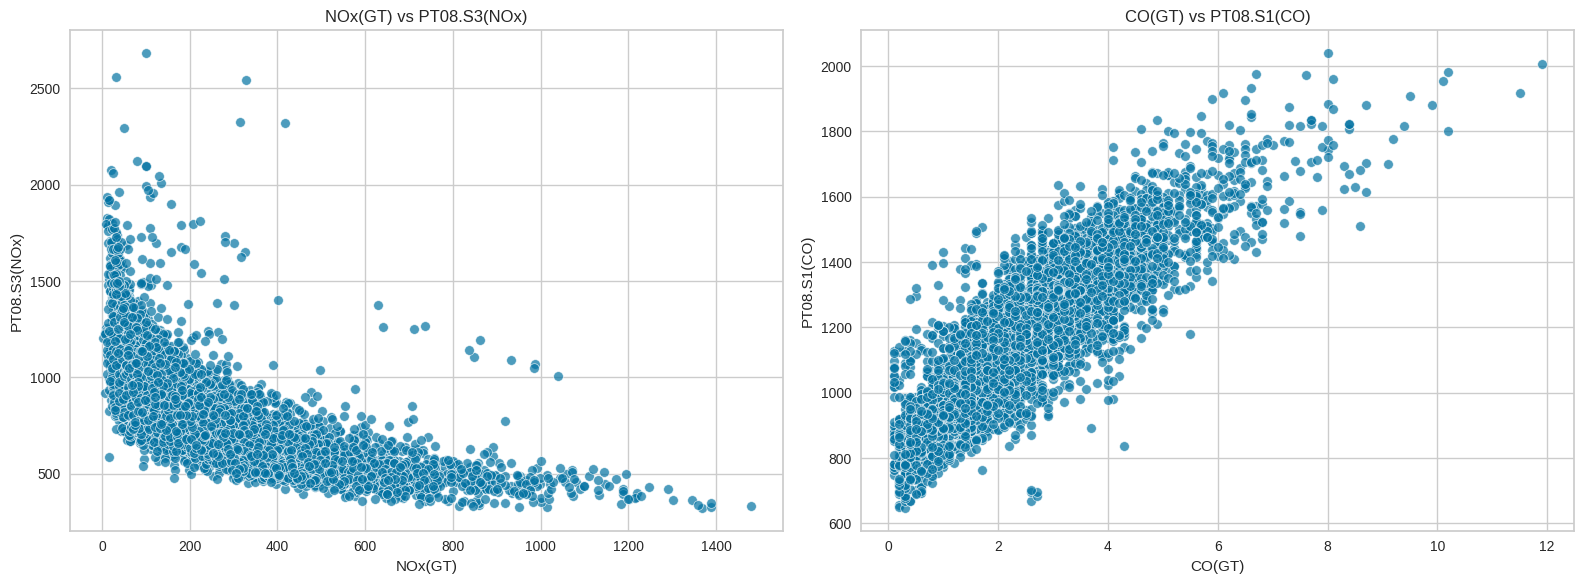

In [1238]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# NOx(GT) vs PT08.S3(NOx)
sns.scatterplot(ax=axes[0], x='NOx(GT)', y='PT08.S3(NOx)', data=df, alpha=0.7)
axes[0].set_title('NOx(GT) vs PT08.S3(NOx)')
axes[0].set_xlabel('NOx(GT)')
axes[0].set_ylabel('PT08.S3(NOx)')

# CO(GT) vs PT08.S1(CO)
sns.scatterplot(ax=axes[1], x='CO(GT)', y='PT08.S1(CO)', data=df, alpha=0.7)
axes[1].set_title('CO(GT) vs PT08.S1(CO)')
axes[1].set_xlabel('CO(GT)')
axes[1].set_ylabel('PT08.S1(CO)')

plt.tight_layout()
plt.show()

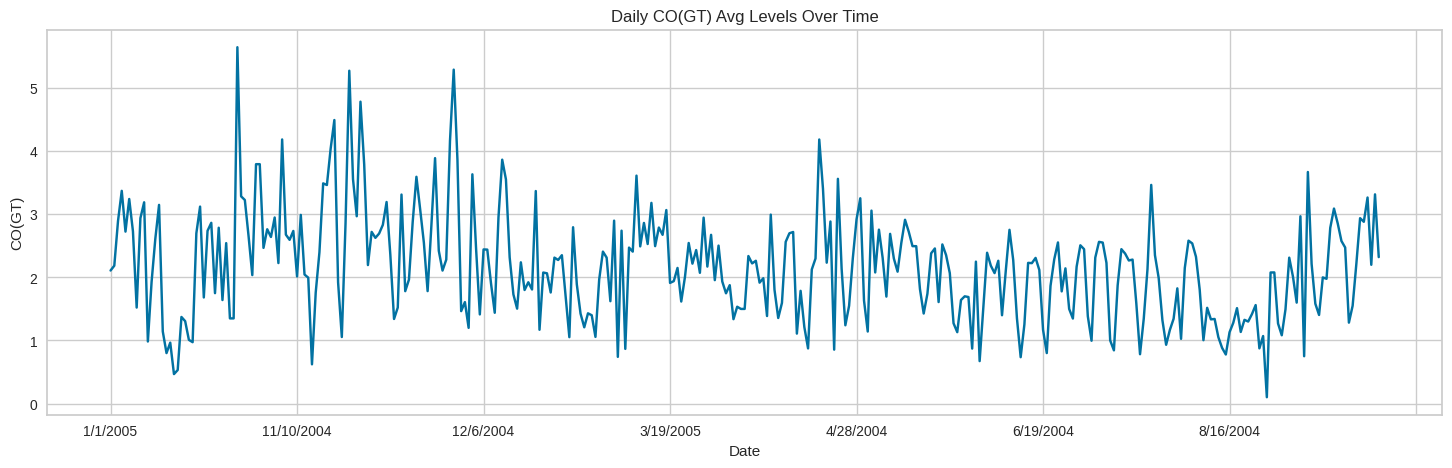

In [1239]:
daily_avg = df.groupby('Date')['CO(GT)'].mean()

plt.figure(figsize=(18, 5))
daily_avg.plot(kind='line')
plt.title('Daily CO(GT) Avg Levels Over Time')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.grid(True)
plt.show()

# **5. Data Preprocessing**

## Remove Duplicated Rows & Missing Values

In [1240]:
df.dropna(inplace=True)

In [1241]:
df.drop_duplicates(inplace=True)

## Feature Engineering

In [1242]:
# Create a new feature by combining 'CO(GT)' and 'PT08.S1(CO)'
df['CO_Product'] = df['CO(GT)'] * df['PT08.S1(CO)']
df['CO_Avg'] = (df['CO(GT)'] + df['PT08.S1(CO)']) / 2
df['CO_Ratio'] = df['CO(GT)'] / (df['PT08.S1(CO)'] + 1e-6)

df[['CO_Product', 'CO_Avg', 'CO_Ratio']].describe()

CO_Product   CO_Avg  CO_Ratio
count    6941.000 6941.000  6941.000
mean     2720.594  561.048     0.002
std      2383.456  109.999     0.001
min        74.900  323.650     0.000
25%      1075.000  479.000     0.001
50%      2023.500  543.450     0.002
75%      3627.900  628.500     0.002
max     23895.200 1024.000     0.006

In [1243]:
# Create a new feature by combining 'C6H6(GT)' and 'PT08.S2(NMHC)'
df['Benzena_Product'] = df['C6H6(GT)'] * df['PT08.S2(NMHC)']
df['Benzena_Avg'] = (df['C6H6(GT)'] + df['PT08.S2(NMHC)']) / 2
df['Benzena_Ratio'] = df['C6H6(GT)'] / (df['PT08.S2(NMHC)'] + 1e-6)

df[['Benzena_Product', 'Benzena_Avg', 'Benzena_Ratio']].describe()

Benzena_Product  Benzena_Avg  Benzena_Ratio
count         6941.000     6941.000       6941.000
mean         12053.788      484.549          0.010
std          12074.660      135.697          0.004
min             78.000      195.100          0.000
25%           3724.000      382.450          0.006
50%           8192.800      469.900          0.009
75%          16571.000      574.800          0.013
max         141031.800     1138.850          0.029

In [1244]:
# Total Polutan
df['Total_Polutan'] = df[['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']].sum(axis=1)

df['Total_Polutan'].describe()

count   6941.000
mean     228.638
std      284.965
min     -191.200
25%       18.500
50%      161.800
75%      366.100
max     1739.000
Name: Total_Polutan, dtype: float64

In [1245]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Extract temporal components
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)  # Binary feature: 1 for weekend, 0 for weekday

df[['Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsWeekend']].sample(5)

Year  Month  Day  Hour  DayOfWeek  IsWeekend
8155  2005      2   13    13          6          1
5871  2004     11   10     9          2          0
2316  2004      6   15     6          1          0
5425  2004     10   22    19          4          0
6239  2004     11   25    17          3          0

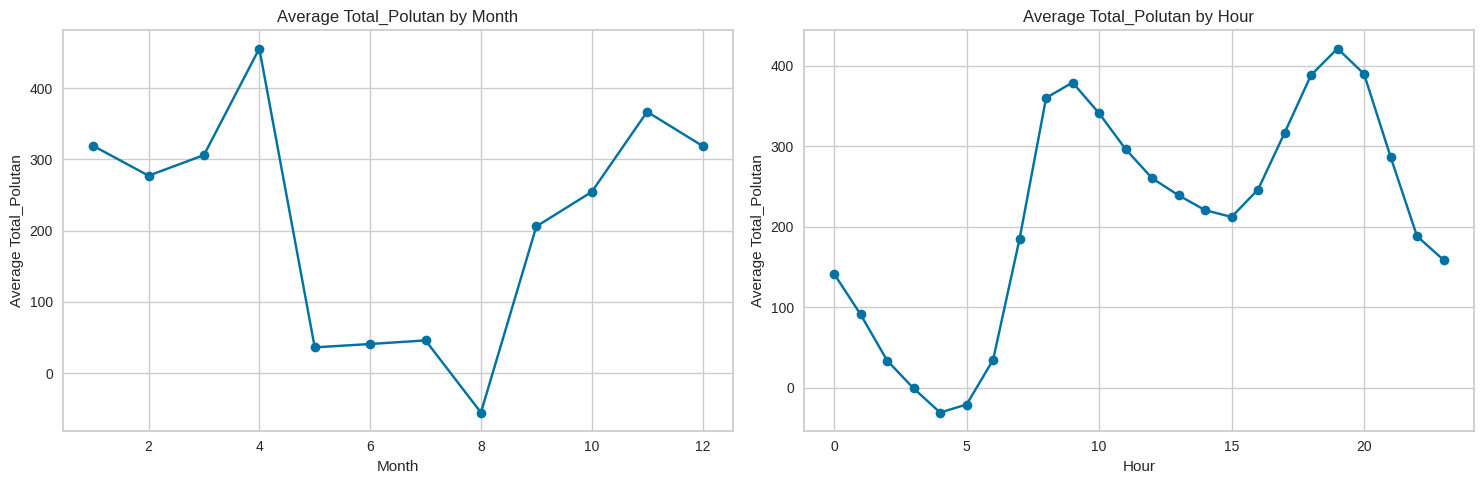

In [1246]:
monthly_avg = df.groupby('Month')['Total_Polutan'].mean()
hourly_avg = df.groupby('Hour')['Total_Polutan'].mean()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
monthly_avg.plot(kind='line', marker='o')
plt.title('Average Total_Polutan by Month')
plt.xlabel('Month')
plt.ylabel('Average Total_Polutan')
plt.grid(True)

plt.subplot(1, 2, 2)
hourly_avg.plot(kind='line', marker='o')
plt.title('Average Total_Polutan by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Total_Polutan')
plt.grid(True)

plt.tight_layout()
plt.show()

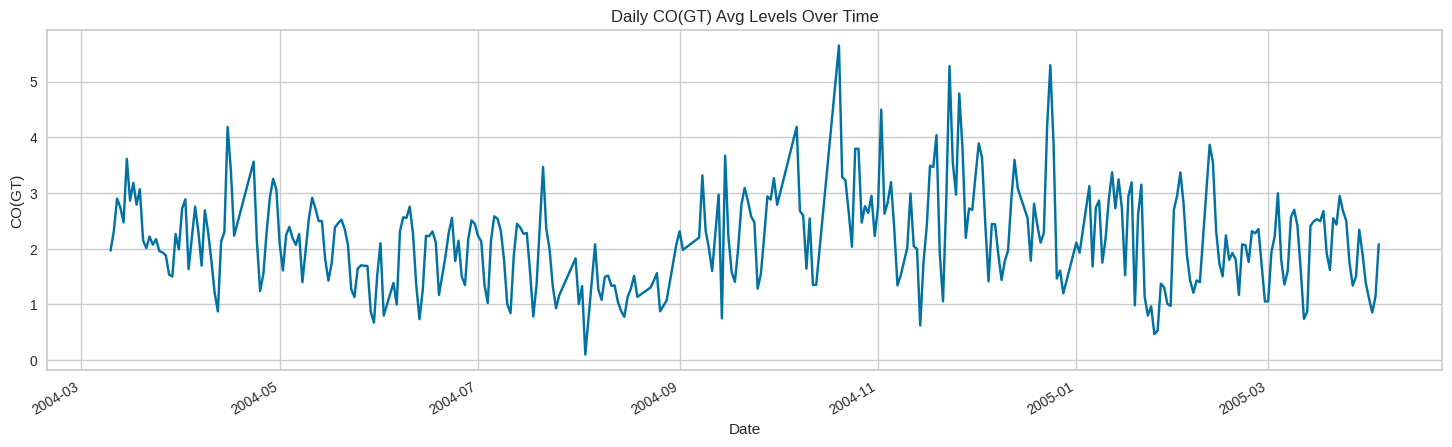

In [1247]:
df['Date'] = pd.to_datetime(df['Date'])
daily_avg = df.groupby('Date')['CO(GT)'].mean()

plt.figure(figsize=(18, 5))
daily_avg.plot(kind='line')
plt.title('Daily CO(GT) Avg Levels Over Time')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.grid(True)
plt.show()

## Handle Outliers

In [1248]:
# # Winsorize
# for col in df:
#     df[col] = winsorize(df[col], limits=[0.01, 0.01])

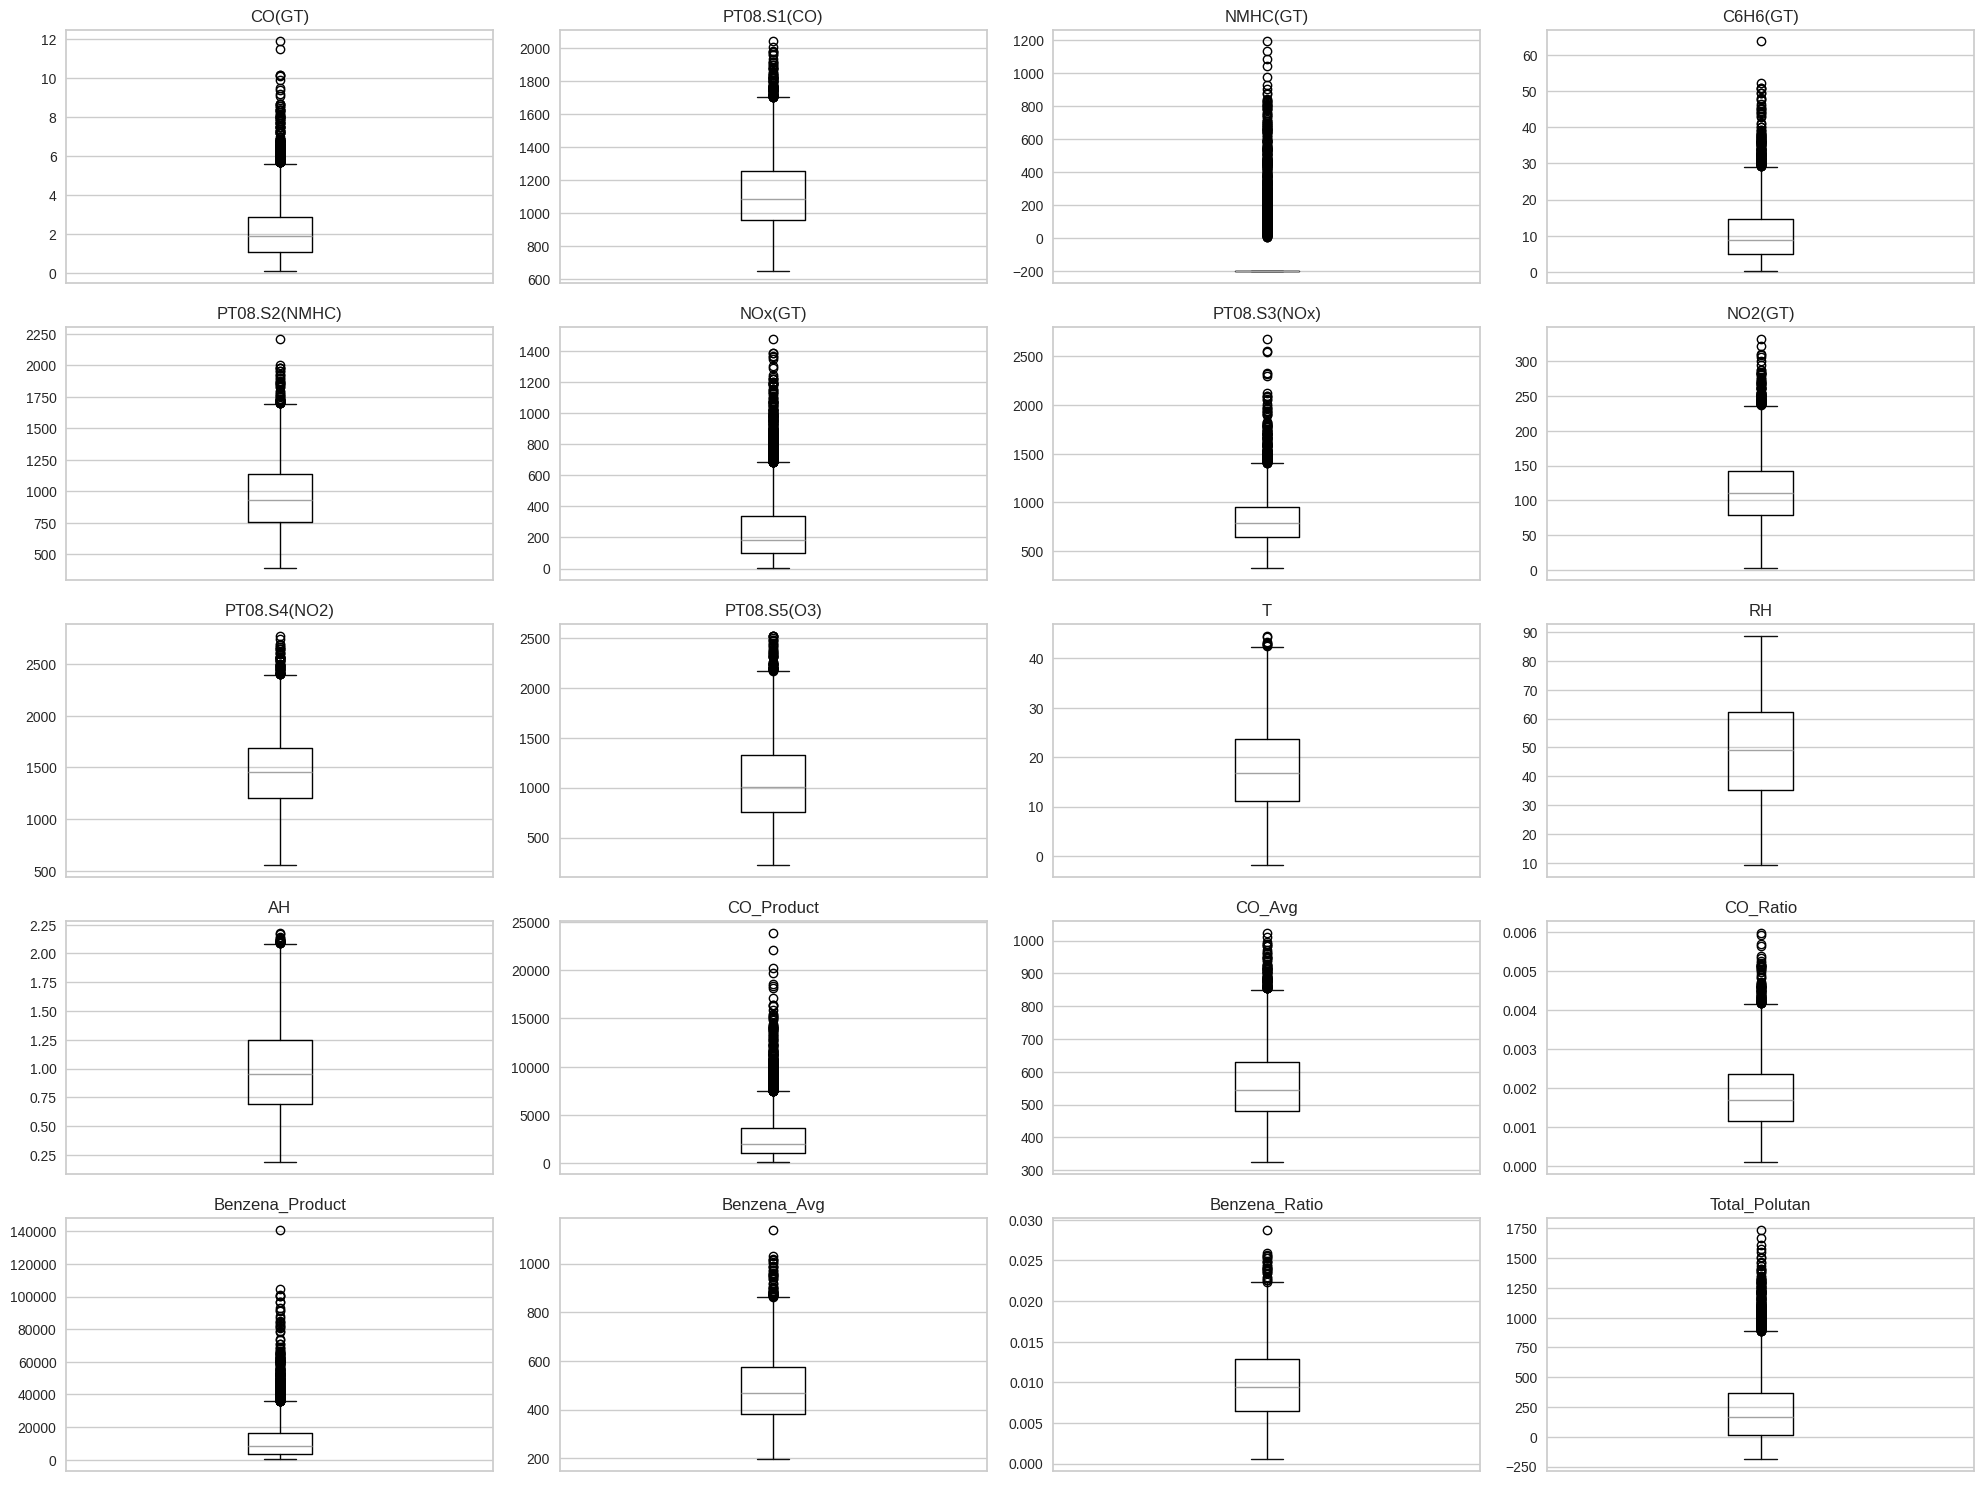

In [1249]:
float_features = df.select_dtypes(include='float')

num_features = len(float_features.columns)
num_cols = 4
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(float_features.columns):
    float_features.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xticks([])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Data Encoding

In [1250]:
# Binary Encoding for DayOfWeek
df['DayOfWeek_binary'] = df['DayOfWeek'].apply(lambda x: format(x, '03b'))

binary_columns = ['DayOfWeek_bit0', 'DayOfWeek_bit1', 'DayOfWeek_bit2']
df[binary_columns] = df['DayOfWeek_binary'].apply(lambda x: pd.Series(list(x))).astype(int)

df.drop(['DayOfWeek_binary'], axis=1, inplace=True)
df.drop(['DayOfWeek'], axis=1, inplace=True)

df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0 2004-03-10  18:00:00   2.600     1360.000   150.000    11.900   
1 2004-03-10  19:00:00   2.000     1292.000   112.000     9.400   
2 2004-03-10  20:00:00   2.200     1402.000    88.000     9.000   
3 2004-03-10  21:00:00   2.200     1376.000    80.000     9.200   
4 2004-03-10  22:00:00   1.600     1272.000    51.000     6.500   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0       1046.000  166.000      1056.000  113.000      1692.000     1268.000   
1        955.000  103.000      1174.000   92.000      1559.000      972.000   
2        939.000  131.000      1140.000  114.000      1555.000     1074.000   
3        948.000  172.000      1092.000  122.000      1584.000     1203.000   
4        836.000  131.000      1205.000  116.000      1490.000     1110.000   

       T     RH    AH  CO_Product  CO_Avg  CO_Ratio  Benzena_Product  \
0 13.600 48.900 0.758    3536.000 681.300     0.002        12447.400   
1 13.300 47.700 0.726    2584.000 647.000     0.002         8977.000   
2 11.900 54.000 0.750    3084.400 702.100     0.002         8451.000   
3 11.000 60.000 0.787    3027.200 689.100     0.002         8721.600   
4 11.200 59.600 0.789    2035.200 636.800     0.001         5434.000   

   Benzena_Avg  Benzena_Ratio  Total_Polutan            Datetime  Year  Month  \
0      528.950          0.011        443.500 2004-03-10 18:00:00  2004      3   
1      482.200          0.010        318.400 2004-03-10 19:00:00  2004      3   
2      474.000          0.010        344.200 2004-03-10 20:00:00  2004      3   
3      478.600          0.010        385.400 2004-03-10 21:00:00  2004      3   
4      421.250          0.008        306.100 2004-03-10 22:00:00  2004      3   

   Day  Hour  IsWeekend  DayOfWeek_bit0  DayOfWeek_bit1  DayOfWeek_bit2  
0   10    18          0               0               1               0  
1   10    19          0               0               1               0  
2   10    20          0               0               1               0  
3   10    21          0               0               1               0  
4   10    22          0               0               1               0

In [1251]:
# Label Encoding for Time
le = LabelEncoder()
df['Time'] = le.fit_transform(df['Time'])

In [1252]:
# Cyclic Encoding for Hour & Month
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

## Data Binning

In [1253]:
# Binning for CO(GT)
bins_co = [0, 2, 5, 12]
labels_co = ['Low', 'Medium', 'High']
df['CO_Category'] = pd.cut(df['CO(GT)'], bins=bins_co, labels=labels_co)

# Binning for T (Temperature)
df['Temperature_Category'] = pd.qcut(df['T'], q=3, labels=['Cold', 'Moderate', 'Hot'])

# Binning for NO2(GT)
bins_no2 = [0, 100, 200, 340]
labels_no2 = ['Low', 'Medium', 'High']
df['NO2_Category'] = pd.cut(df['NO2(GT)'], bins=bins_no2, labels=labels_no2)

# Binning for Hour (Time of Day)
def categorize_hour(hour):
    if hour < 6:
        return 'Night'
    elif hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['Time_of_Day'] = df['Hour'].apply(lambda x: categorize_hour(x))

# Binning for C6H6(GT)
bins_c6h6 = [0, 10, 30, 64]
labels_c6h6 = ['Low', 'Medium', 'High']
df['C6H6_Category'] = pd.cut(df['C6H6(GT)'], bins=bins_c6h6, labels=labels_c6h6)

df[['CO_Category', 'Temperature_Category', 'NO2_Category', 'Time_of_Day', 'C6H6_Category']].sample(5)

CO_Category Temperature_Category NO2_Category Time_of_Day C6H6_Category
7324         Low             Moderate       Medium     Evening           Low
742          Low                  Hot          Low   Afternoon           Low
434          Low             Moderate       Medium     Evening           Low
7787         Low                 Cold          Low       Night           Low
6001      Medium                 Cold       Medium     Evening        Medium

In [1254]:
df['Time_of_Day'].value_counts()

Time_of_Day
Evening      1849
Morning      1843
Afternoon    1841
Night        1408
Name: count, dtype: int64

In [1255]:
# Label encoding for each binned column
label_cols = ['CO_Category', 'Temperature_Category', 'NO2_Category', 'Time_of_Day', 'C6H6_Category']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

df[['CO_Category', 'Temperature_Category', 'NO2_Category', 'Time_of_Day', 'C6H6_Category']].sample(5)

CO_Category  Temperature_Category  NO2_Category  Time_of_Day  \
6420            1                     2             1            2   
5703            2                     2             2            2   
9101            2                     2             2            1   
6623            2                     2             2            0   
8650            1                     0             1            3   

      C6H6_Category  
6420              1  
5703              2  
9101              2  
6623              2  
8650              1

In [1256]:
columns_to_drop = ['Datetime', 'Date', 'Time', 'Month', 'Hour']
df.drop(columns=columns_to_drop, inplace=True)

df.describe()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
count 6941.000     6941.000  6941.000  6941.000       6941.000 6941.000   
mean     2.182     1119.913  -148.645    10.554        958.543  250.672   
std      1.441      218.734   157.077     7.465        264.055  208.611   
min      0.100      647.000  -200.000     0.200        390.000    2.000   
25%      1.100      956.000  -200.000     4.900        760.000  103.000   
50%      1.900     1085.000  -200.000     8.800        931.000  186.000   
75%      2.900     1254.000  -200.000    14.600       1135.000  335.000   
max     11.900     2040.000  1189.000    63.700       2214.000 1479.000   

       PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)        T       RH  \
count      6941.000 6941.000      6941.000     6941.000 6941.000 6941.000   
mean        816.893  113.874      1452.649     1057.757   17.755   48.882   
std         251.897   47.475       353.302      406.510    8.845   17.433   
min         322.000    2.000       551.000      221.000   -1.900    9.200   
25%         642.000   79.000      1207.000      760.000   11.200   35.300   
50%         786.000  110.000      1457.000     1006.000   16.800   49.200   
75%         947.000  142.000      1683.000     1322.000   23.700   62.200   
max        2683.000  333.000      2775.000     2523.000   44.600   88.700   

            AH  CO_Product   CO_Avg  CO_Ratio  Benzena_Product  Benzena_Avg  \
count 6941.000    6941.000 6941.000  6941.000         6941.000     6941.000   
mean     0.986    2720.594  561.048     0.002        12053.788      484.549   
std      0.401    2383.456  109.999     0.001        12074.660      135.697   
min      0.185      74.900  323.650     0.000           78.000      195.100   
25%      0.694    1075.000  479.000     0.001         3724.000      382.450   
50%      0.954    2023.500  543.450     0.002         8192.800      469.900   
75%      1.252    3627.900  628.500     0.002        16571.000      574.800   
max      2.181   23895.200 1024.000     0.006       141031.800     1138.850   

       Benzena_Ratio  Total_Polutan     Year      Day  IsWeekend  \
count       6941.000       6941.000 6941.000 6941.000   6941.000   
mean           0.010        228.638 2004.281   15.997      0.299   
std            0.004        284.965    0.449    8.708      0.458   
min            0.000       -191.200 2004.000    1.000      0.000   
25%            0.006         18.500 2004.000    9.000      0.000   
50%            0.009        161.800 2004.000   16.000      0.000   
75%            0.013        366.100 2005.000   24.000      1.000   
max            0.029       1739.000 2005.000   31.000      1.000   

       DayOfWeek_bit0  DayOfWeek_bit1  DayOfWeek_bit2  Hour_sin  Hour_cos  \
count        6941.000        6941.000        6941.000  6941.000  6941.000   
mean            0.443           0.420           0.428    -0.048    -0.040   
std             0.497           0.494           0.495     0.702     0.710   
min             0.000           0.000           0.000    -1.000    -1.000   
25%             0.000           0.000           0.000    -0.707    -0.707   
50%             0.000           0.000           0.000     0.000    -0.000   
75%             1.000           1.000           1.000     0.500     0.707   
max             1.000           1.000           1.000     1.000     1.000   

       Month_sin  Month_cos  CO_Category  Temperature_Category  NO2_Category  \
count   6941.000   6941.000     6941.000              6941.000      6941.000   
mean       0.145      0.010        1.357                 1.003         1.482   
std        0.707      0.692        0.564                 0.820         0.590   
min       -1.000     -1.000        0.000                 0.000         0.000   
25%       -0.500     -0.500        1.000                 0.000         1.000   
50%        0.000      0.000        1.000                 1.000         2.000   
75%        0.866      0.866        2.000                 2.

In [1257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CO(GT)                6941 non-null   float64
 1   PT08.S1(CO)           6941 non-null   float64
 2   NMHC(GT)              6941 non-null   float64
 3   C6H6(GT)              6941 non-null   float64
 4   PT08.S2(NMHC)         6941 non-null   float64
 5   NOx(GT)               6941 non-null   float64
 6   PT08.S3(NOx)          6941 non-null   float64
 7   NO2(GT)               6941 non-null   float64
 8   PT08.S4(NO2)          6941 non-null   float64
 9   PT08.S5(O3)           6941 non-null   float64
 10  T                     6941 non-null   float64
 11  RH                    6941 non-null   float64
 12  AH                    6941 non-null   float64
 13  CO_Product            6941 non-null   float64
 14  CO_Avg                6941 non-null   float64
 15  CO_Ratio              6941

## Standardize Features

In [1258]:
df_scaled = df.copy()

X = df_scaled.select_dtypes(include=['float64', 'int64']).columns
exclude_columns = ['IsWeekend', 'DayOfWeek_bit0', 'DayOfWeek_bit1', 'DayOfWeek_bit2', 'CO_Category', 'Temperature_Category', 'C6H6_Category']
X = [col for col in X if col not in exclude_columns]

scaler = StandardScaler()

df_scaled[X] = scaler.fit_transform(df_scaled[X])

df_scaled[X].head()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0   0.290        1.098     1.901     0.180          0.331   -0.406   
1  -0.127        0.787     1.659    -0.155         -0.013   -0.708   
2   0.012        1.290     1.507    -0.208         -0.074   -0.574   
3   0.012        1.171     1.456    -0.181         -0.040   -0.377   
4  -0.404        0.695     1.271    -0.543         -0.464   -0.574   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)      T     RH     AH  \
0         0.949   -0.018         0.678        0.517 -0.470  0.001 -0.568   
1         1.418   -0.461         0.301       -0.211 -0.504 -0.068 -0.648   
2         1.283    0.003         0.290        0.040 -0.662  0.294 -0.587   
3         1.092    0.171         0.372        0.357 -0.764  0.638 -0.496   
4         1.541    0.045         0.106        0.129 -0.741  0.615 -0.491   

   CO_Product  CO_Avg  CO_Ratio  Benzena_Product  Benzena_Avg  Benzena_Ratio  \
0       0.342   1.093     0.109            0.033        0.327          0.359   
1      -0.057   0.781    -0.301           -0.255       -0.017          0.009   
2       0.153   1.282    -0.277           -0.298       -0.078         -0.050   
3       0.129   1.164    -0.244           -0.276       -0.044         -0.023   
4      -0.288   0.689    -0.629           -0.548       -0.467         -0.463   

   Total_Polutan  Hour_sin  Hour_cos  Month_sin  Month_cos  NO2_Category  \
0          0.754    -1.356     0.057      1.209     -0.015         0.877   
1          0.315    -1.308     0.422      1.209     -0.015        -0.818   
2          0.406    -1.166     0.761      1.209     -0.015         0.877   
3          0.550    -0.939     1.053      1.209     -0.015         0.877   
4          0.272    -0.644     1.277      1.209     -0.015         0.877   

   Time_of_Day  
0       -0.374  
1       -0.374  
2       -0.374  
3       -0.374  
4       -0.374

In [1259]:
df_scaled.describe()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
count 6941.000     6941.000  6941.000  6941.000       6941.000 6941.000   
mean     0.000       -0.000    -0.000     0.000          0.000   -0.000   
std      1.000        1.000     1.000     1.000          1.000    1.000   
min     -1.445       -2.162    -0.327    -1.387         -2.153   -1.192   
25%     -0.751       -0.749    -0.327    -0.757         -0.752   -0.708   
50%     -0.196       -0.160    -0.327    -0.235         -0.104   -0.310   
75%      0.498        0.613    -0.327     0.542          0.668    0.404   
max      6.743        4.207     8.516     7.120          4.755    5.889   

       PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)        T       RH  \
count      6941.000 6941.000      6941.000     6941.000 6941.000 6941.000   
mean         -0.000    0.000        -0.000       -0.000    0.000   -0.000   
std           1.000    1.000         1.000        1.000    1.000    1.000   
min          -1.965   -2.357        -2.552       -2.059   -2.222   -2.276   
25%          -0.694   -0.735        -0.695       -0.733   -0.741   -0.779   
50%          -0.123   -0.082         0.012       -0.127   -0.108    0.018   
75%           0.517    0.592         0.652        0.650    0.672    0.764   
max           7.409    4.616         3.743        3.605    3.035    2.284   

            AH  CO_Product   CO_Avg  CO_Ratio  Benzena_Product  Benzena_Avg  \
count 6941.000    6941.000 6941.000  6941.000         6941.000     6941.000   
mean     0.000      -0.000   -0.000     0.000            0.000        0.000   
std      1.000       1.000    1.000     1.000            1.000        1.000   
min     -1.997      -1.110   -2.158    -1.948           -0.992       -2.133   
25%     -0.727      -0.690   -0.746    -0.744           -0.690       -0.752   
50%     -0.079      -0.292   -0.160    -0.134           -0.320       -0.108   
75%      0.663       0.381    0.613     0.618            0.374        0.665   
max      2.980       8.885    4.209     4.719           10.682        4.822   

       Benzena_Ratio  Total_Polutan     Year      Day  IsWeekend  \
count       6941.000       6941.000 6941.000 6941.000   6941.000   
mean           0.000         -0.000 2004.281   15.997      0.299   
std            1.000          1.000    0.449    8.708      0.458   
min           -2.123         -1.473 2004.000    1.000      0.000   
25%           -0.760         -0.737 2004.000    9.000      0.000   
50%           -0.080         -0.235 2004.000   16.000      0.000   
75%            0.690          0.482 2005.000   24.000      1.000   
max            4.326          5.301 2005.000   31.000      1.000   

       DayOfWeek_bit0  DayOfWeek_bit1  DayOfWeek_bit2  Hour_sin  Hour_cos  \
count        6941.000        6941.000        6941.000  6941.000  6941.000   
mean            0.443           0.420           0.428     0.000     0.000   
std             0.497           0.494           0.495     1.000     1.000   
min             0.000           0.000           0.000    -1.356    -1.352   
25%             0.000           0.000           0.000    -0.939    -0.939   
50%             0.000           0.000           0.000     0.069     0.057   
75%             1.000           1.000           1.000     0.781     1.053   
max             1.000           1.000           1.000     1.494     1.466   

       Month_sin  Month_cos  CO_Category  Temperature_Category  NO2_Category  \
count   6941.000   6941.000     6941.000              6941.000      6941.000   
mean       0.000      0.000        1.357                 1.003        -0.000   
std        1.000      1.000        0.564                 0.820         1.000   
min       -1.620     -1.460        0.000                 0.000        -2.513   
25%       -0.913     -0.737        1.000                 0.000        -0.818   
50%       -0.205     -0.015        1.000                 1.000         0.877   
75%        1.020      1.236        2.000                 2.

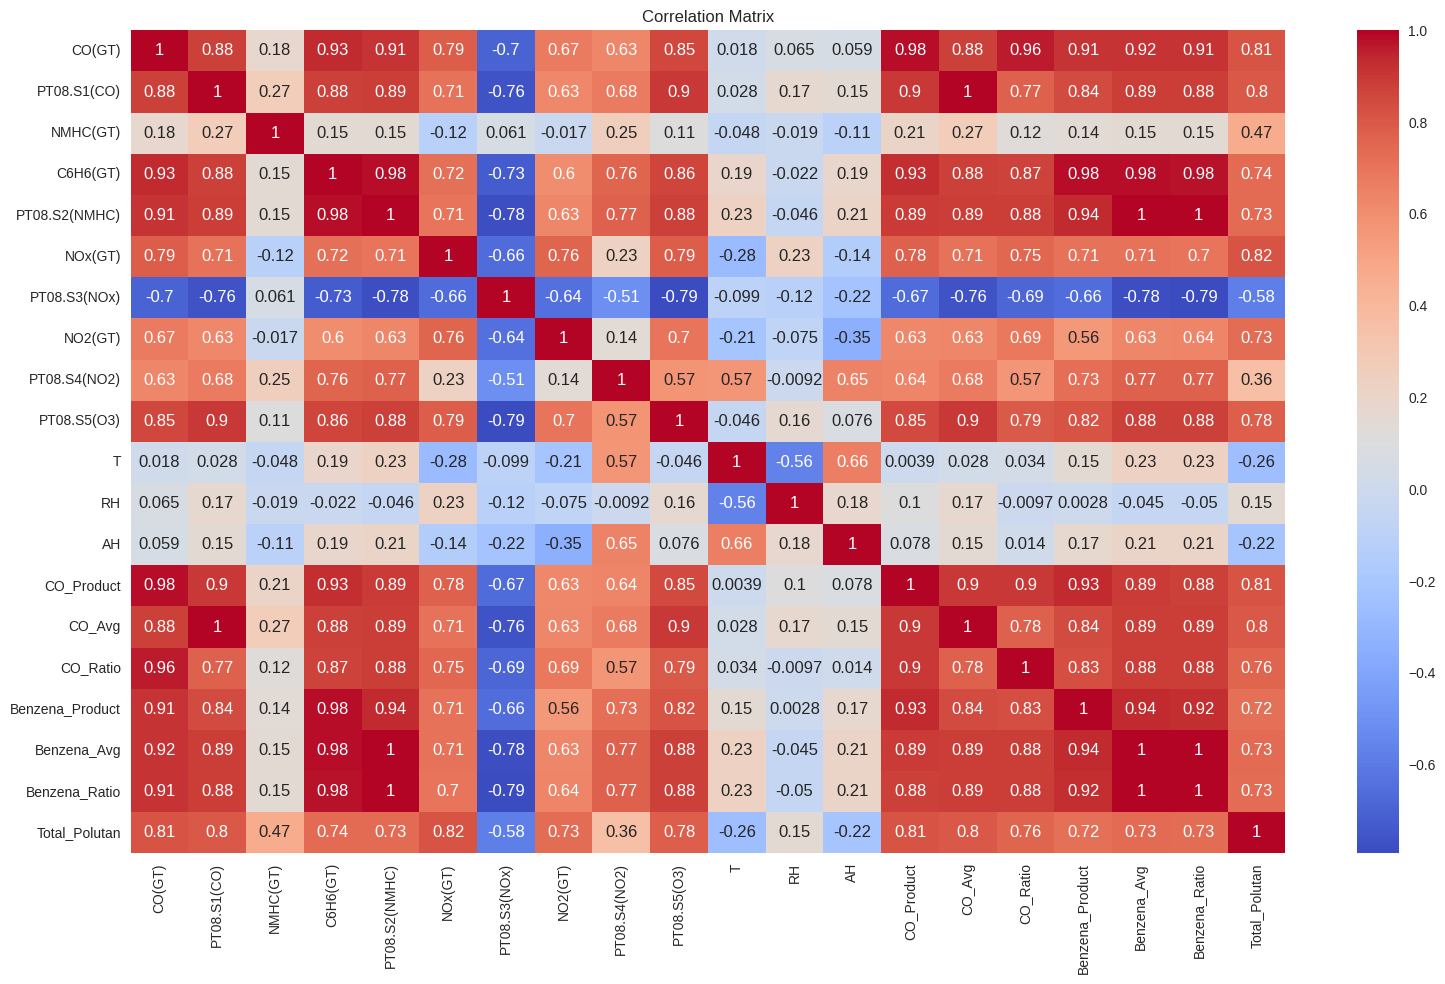

In [1260]:
excluded_columns = list(df_scaled.columns[-15:])
df_subset = df_scaled.drop(columns=excluded_columns)

plt.figure(figsize=(16, 10))
sns.heatmap(df_subset.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## PCA

Explained Variance Ratio by Principal Components:
[0.64735984 0.13463308]


Text(0.5, 1.0, 'PCA Result')

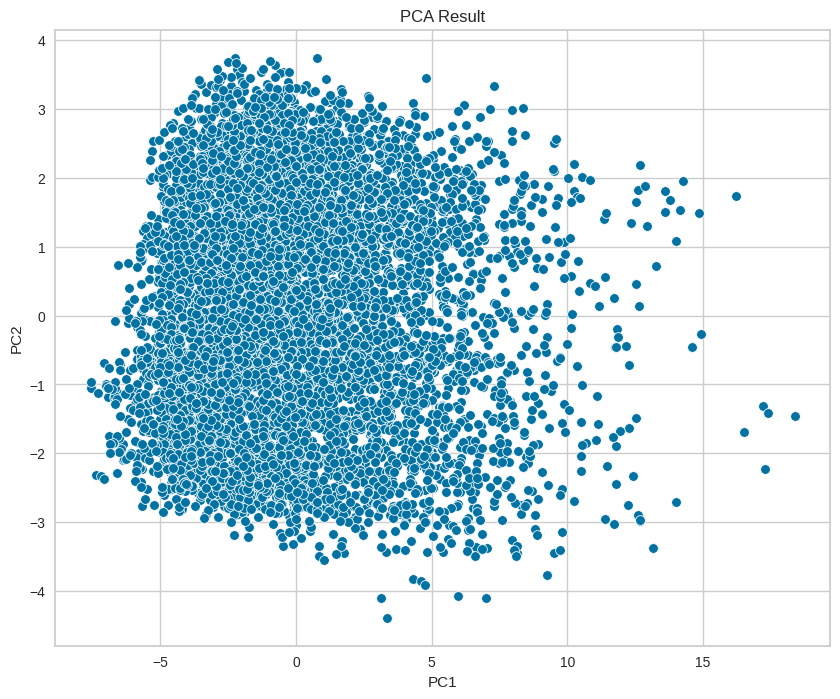

In [1261]:
# Initialize PCA for 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_subset)

# Create a DataFrame for the principal components
x_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Display the explained variance ratio
print('Explained Variance Ratio by Principal Components:')
print(pca.explained_variance_ratio_)

# visualize pca
plt.figure(figsize=(10, 8))
sns.scatterplot(data=x_pca, x='PC1', y='PC2')
plt.title('PCA Result')

# **6. Clustering Model Building**

## **Clustering Model Building & Evaluation**

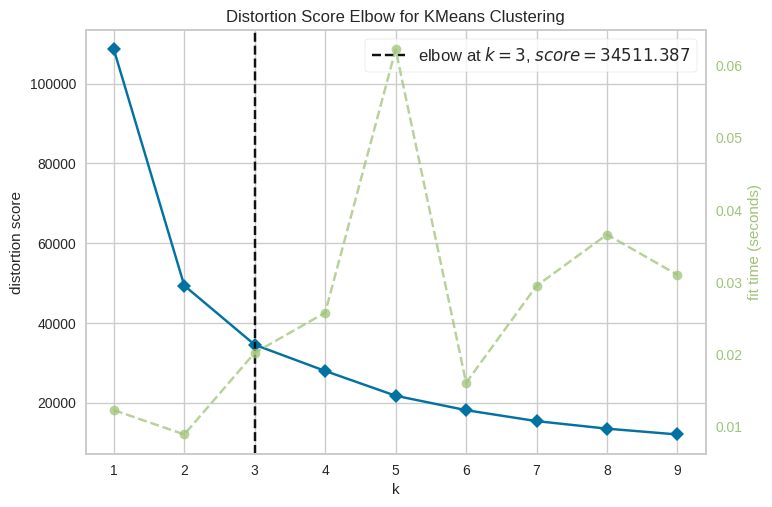

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1262]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(x_pca)
visualizer.show()

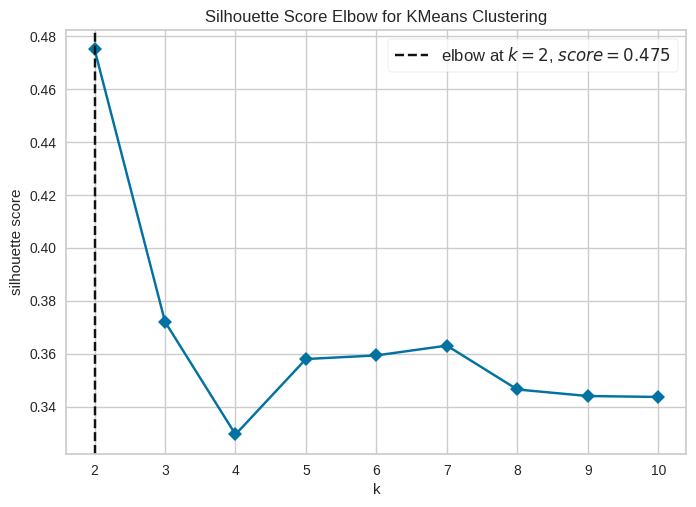

In [1263]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False)

visualizer.fit(x_pca)
visualizer.show()

optimal_k = visualizer.elbow_value_
best_score_k = visualizer.elbow_score_

In [1264]:
def dbscan_silhouette_analysis(x_pca1, eps_values, min_samples=5):
    silhouette_scores = []
    num_clusters_list = []

    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(x_pca1)

        num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        num_clusters_list.append(num_clusters)

        if num_clusters > 1:
            sil_score = silhouette_score(x_pca1, dbscan_labels)
            silhouette_scores.append(sil_score)
        else:
            silhouette_scores.append(None)

    # Filter valid silhouette scores
    valid_scores = [(eps, score) for eps, score in zip(eps_values, silhouette_scores) if score is not None]
    best_eps, best_score = None, None
    if valid_scores:
        best_eps, best_score = max(valid_scores, key=lambda x: x[1])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(eps_values, [s if s is not None else 0 for s in silhouette_scores], marker='o', label="Silhouette Score")
    plt.xticks(eps_values)
    plt.xlabel("eps (DBSCAN parameter)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score for DBSCAN Clustering")
    if valid_scores:
        plt.axvline(x=best_eps, linestyle='--', color='black', label=f"Best eps = {best_eps}, score = {best_score:.3f}")
    plt.legend()
    plt.grid(True)
    plt.show()

    return best_eps, best_score, silhouette_scores

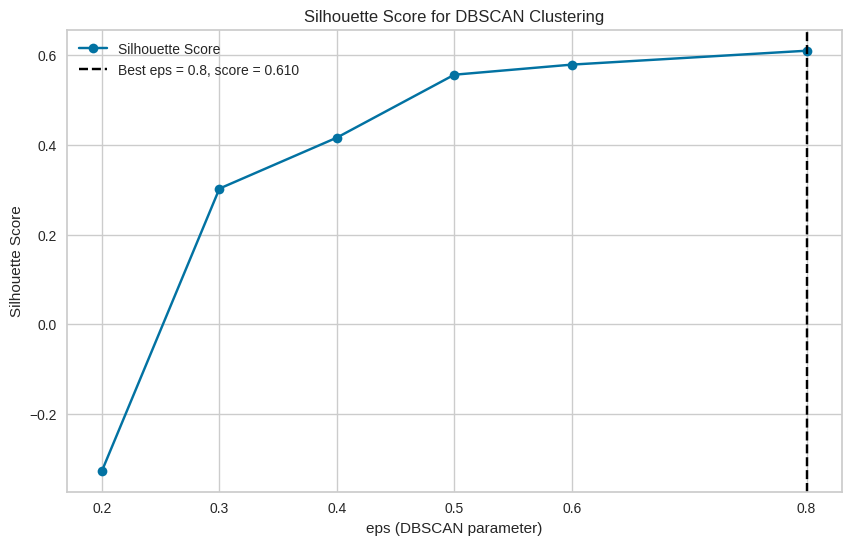

In [1265]:
eps_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.8]

best_eps, best_score, silhouette_scores = dbscan_silhouette_analysis(x_pca, eps_values)

## **Feature Selection**

In [1266]:
selected_features = ['Benzena_Ratio', 'Benzena_Product', 'CO_Ratio', 'CO_Product', 'Total_Polutan']
x = df_scaled[selected_features]

Explained Variance Ratio by Principal Components:
[0.87144645 0.06785586]


Text(0.5, 1.0, 'PCA Result')

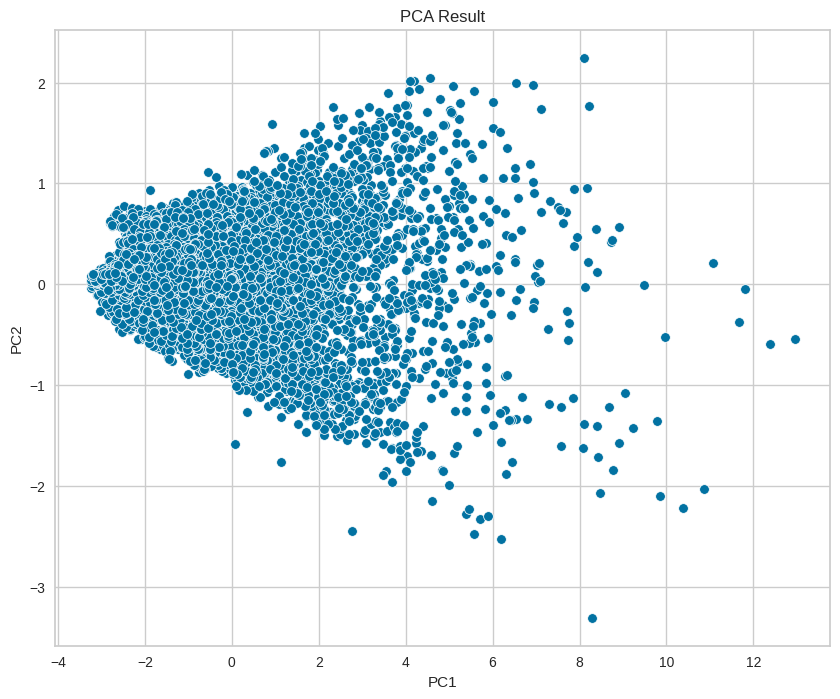

In [1267]:
principal_components = pca.fit_transform(x)
x_pca1 = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print('Explained Variance Ratio by Principal Components:')
print(pca.explained_variance_ratio_)

# visualize pca
plt.figure(figsize=(10, 8))
sns.scatterplot(data=x_pca1, x='PC1', y='PC2')
plt.title('PCA Result')

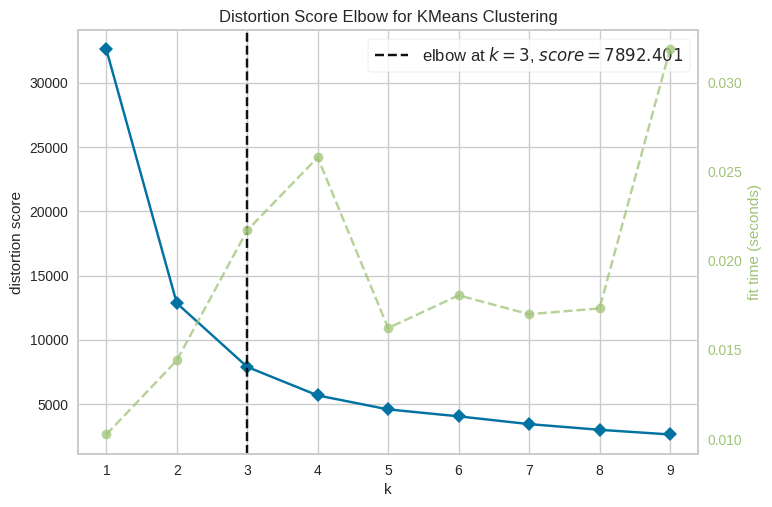

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1268]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(x_pca1)
visualizer.show()

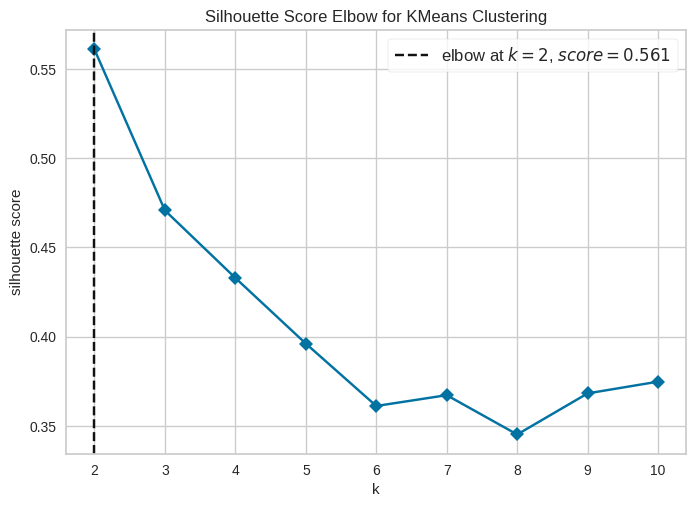

In [1269]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False)

visualizer.fit(x_pca1)
visualizer.show()

optimal_k1 = visualizer.elbow_value_
best_score_k1 = visualizer.elbow_score_

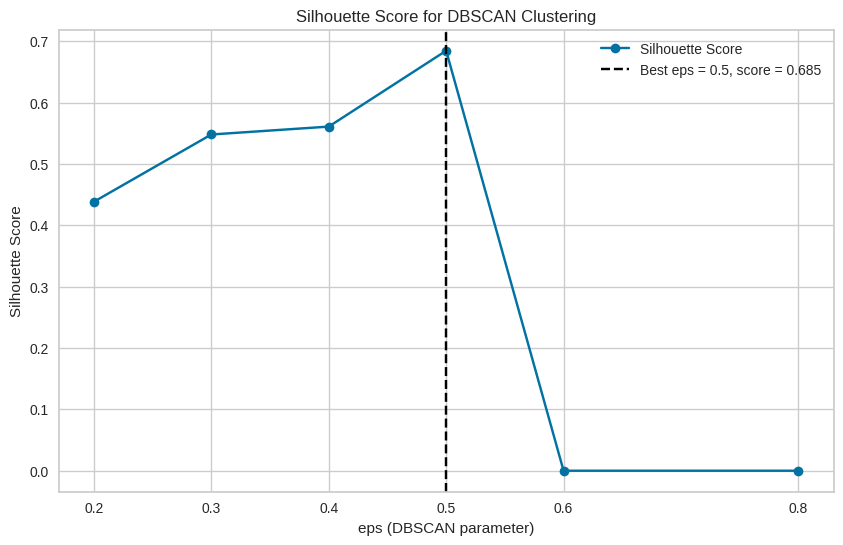

In [1270]:
eps_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.8]

best_eps, best_score, silhouette_scores = dbscan_silhouette_analysis(x_pca1, eps_values)

## **Cluster Visualization & Analysis**

### Before Feature Selection

In [1271]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
clusters = dbscan.fit_predict(x_pca)

X_dbscan = x_pca.copy()
X_dbscan['Cluster'] = clusters
X_dbscan['Cluster'].value_counts()

Cluster
 0    6916
 1      14
-1      11
Name: count, dtype: int64

**DBSCAN RESULT:**

Extreme imbalance (highly imbalanced)

- Cluster 0: 6,916 samples (99.6%)
- Cluster 1: only 14 samples (0.2%)
- Noise (-1): only 11 samples (0.2%)

The clusters formed are unrepresentative as almost all the data falls into just one cluster (cluster 0), thus providing no meaningful insight into the patterns/clustering in the data.

In [1272]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(x_pca)

X_kmeans = x_pca.copy()
X_kmeans['Cluster'] = clusters
X_kmeans['Cluster'].value_counts()

Cluster
1    4585
0    2356
Name: count, dtype: int64

**K-MEANS RESULT**:

From the clustering results using K-Means with k=2 (n_clusters=2), we see better results than the previous DBSCAN

The cluster distribution is more balanced:
- Cluster 1: 4,585 samples (66%)
- Cluster 0: 2,356 samples (34%)

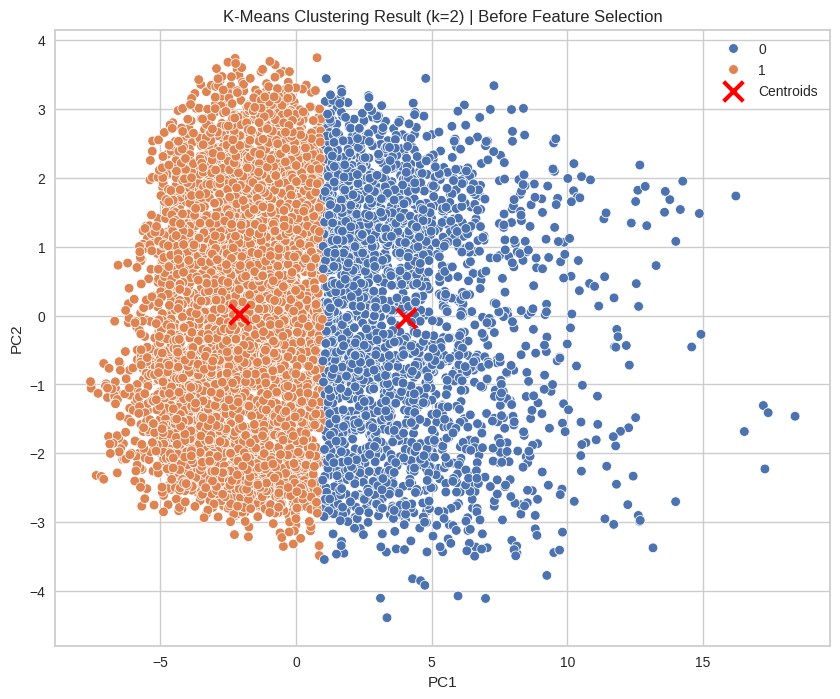

In [1273]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X_kmeans, x='PC1', y='PC2', hue='Cluster', palette='deep')
plt.title('K-Means Clustering Result (k=2) | Before Feature Selection')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.legend()
plt.grid(True)
plt.show()

In [1274]:
print(f"Optimal k: {optimal_k}")
print(f"Best silhouette score: {round(best_score_k, 2)}")

Optimal k: 2
Best silhouette score: 0.47


**NOTE:**

The silhouette score from the KMeans clustering is 0.47, which is below 0.55. This indicates poor cluster separation.

### After Feature Selection

In [1275]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(x_pca1)

X_kmeans1 = x_pca1.copy()
X_kmeans1['Cluster'] = clusters
X_kmeans1['Cluster'].value_counts()

Cluster
0    4926
1    2015
Name: count, dtype: int64

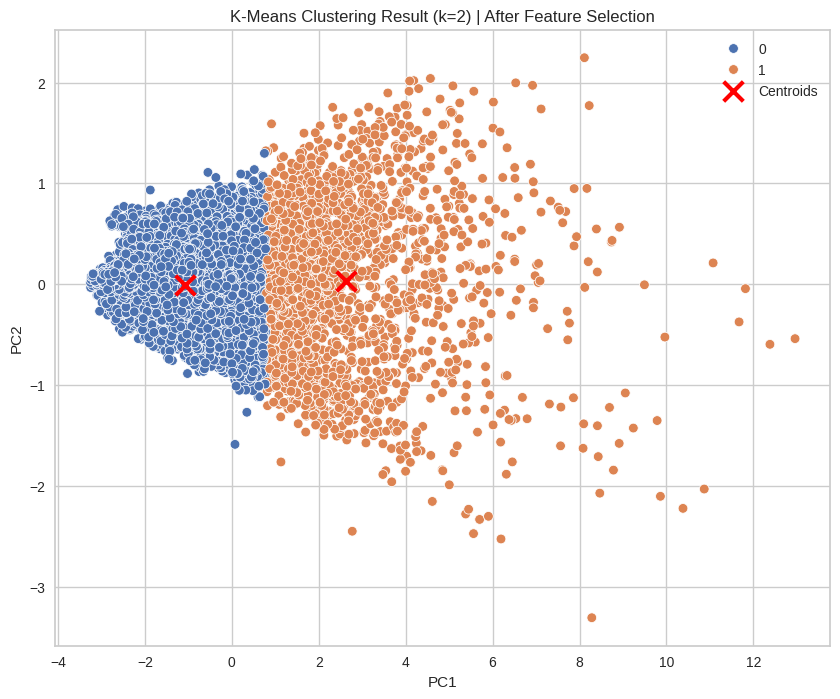

In [1276]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X_kmeans1, x='PC1', y='PC2', hue='Cluster', palette='deep')
plt.title('K-Means Clustering Result (k=2) | After Feature Selection')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.legend()
plt.grid(True)
plt.show()

In [1277]:
print(f"Optimal k: {optimal_k1}")
print(f"Best silhouette score: {round(best_score_k1, 2)}")

Optimal k: 2
Best silhouette score: 0.56


**INSIGHT:**

The silhoutte score of the clustering after feature enginnering is 0.56. Which is where the score results are above 0.55 which indicates a fairly good cluster separation.

## **Interpretation of Cluster Results**

1. Cluster 1:
2. Cluster 2:

# **7. Exporting Data**

Save the results into a CSV file.

In [1278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CO(GT)                6941 non-null   float64
 1   PT08.S1(CO)           6941 non-null   float64
 2   NMHC(GT)              6941 non-null   float64
 3   C6H6(GT)              6941 non-null   float64
 4   PT08.S2(NMHC)         6941 non-null   float64
 5   NOx(GT)               6941 non-null   float64
 6   PT08.S3(NOx)          6941 non-null   float64
 7   NO2(GT)               6941 non-null   float64
 8   PT08.S4(NO2)          6941 non-null   float64
 9   PT08.S5(O3)           6941 non-null   float64
 10  T                     6941 non-null   float64
 11  RH                    6941 non-null   float64
 12  AH                    6941 non-null   float64
 13  CO_Product            6941 non-null   float64
 14  CO_Avg                6941 non-null   float64
 15  CO_Ratio              6941

In [1279]:
X_kmeans1['Cluster']

0       0
1       0
2       0
3       0
4       0
       ..
6936    1
6937    0
6938    0
6939    0
6940    0
Name: Cluster, Length: 6941, dtype: int32

In [1280]:
df['Cluster'] = X_kmeans1['Cluster']

In [1281]:
df['Cluster'].value_counts()

Cluster
0.000    3556
1.000    1366
Name: count, dtype: int64

In [1282]:
df.tail()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
9352   3.100     1314.000  -200.000    13.500       1101.000  472.000   
9353   2.400     1163.000  -200.000    11.400       1027.000  353.000   
9354   2.400     1142.000  -200.000    12.400       1063.000  293.000   
9355   2.100     1003.000  -200.000     9.500        961.000  235.000   
9356   2.200     1071.000  -200.000    11.900       1047.000  265.000   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)      T     RH    AH  \
9352       539.000  190.000      1374.000     1729.000 21.900 29.300 0.757   
9353       604.000  179.000      1264.000     1269.000 24.300 23.700 0.712   
9354       603.000  175.000      1241.000     1092.000 26.900 18.300 0.641   
9355       702.000  156.000      1041.000      770.000 28.300 13.500 0.514   
9356       654.000  168.000      1129.000      816.000 28.500 13.100 0.503   

      CO_Product  CO_Avg  CO_Ratio  Benzena_Product  Benzena_Avg  \
9352    4073.400 658.550     0.002        14863.500      557.250   
9353    2791.200 582.700     0.002        11707.800      519.200   
9354    2740.800 572.200     0.002        13181.200      537.700   
9355    2106.300 502.550     0.002         9129.500      485.250   
9356    2356.200 536.600     0.002        12459.300      529.450   

      Benzena_Ratio  Total_Polutan  Year  Day  IsWeekend  DayOfWeek_bit0  \
9352          0.012        478.600  2005    4          0               0   
9353          0.011        345.800  2005    4          0               0   
9354          0.012        282.800  2005    4          0               0   
9355          0.010        202.600  2005    4          0               0   
9356          0.011        247.100  2005    4          0               0   

      DayOfWeek_bit1  DayOfWeek_bit2  Hour_sin  Hour_cos  Month_sin  \
9352               0               0     0.500    -0.866      0.866   
9353               0               0     0.259    -0.966      0.866   
9354               0               0     0.000    -1.000      0.866   
9355               0               0    -0.259    -0.966      0.866   
9356               0               0    -0.500    -0.866      0.866   

      Month_cos  CO_Category  Temperature_Category  NO2_Category  Time_of_Day  \
9352     -0.500            2                     1             2            2   
9353     -0.500            2                     1             2            2   
9354     -0.500            2                     1             2            0   
9355     -0.500            2                     1             2            0   
9356     -0.500            2                     1             2            0   

      C6H6_Category  Cluster  
9352              2      NaN  
9353              2      NaN  
9354              2      NaN  
9355              1      NaN  
9356              2      NaN

In [1283]:
df.describe()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
count 6941.000     6941.000  6941.000  6941.000       6941.000 6941.000   
mean     2.182     1119.913  -148.645    10.554        958.543  250.672   
std      1.441      218.734   157.077     7.465        264.055  208.611   
min      0.100      647.000  -200.000     0.200        390.000    2.000   
25%      1.100      956.000  -200.000     4.900        760.000  103.000   
50%      1.900     1085.000  -200.000     8.800        931.000  186.000   
75%      2.900     1254.000  -200.000    14.600       1135.000  335.000   
max     11.900     2040.000  1189.000    63.700       2214.000 1479.000   

       PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)        T       RH  \
count      6941.000 6941.000      6941.000     6941.000 6941.000 6941.000   
mean        816.893  113.874      1452.649     1057.757   17.755   48.882   
std         251.897   47.475       353.302      406.510    8.845   17.433   
min         322.000    2.000       551.000      221.000   -1.900    9.200   
25%         642.000   79.000      1207.000      760.000   11.200   35.300   
50%         786.000  110.000      1457.000     1006.000   16.800   49.200   
75%         947.000  142.000      1683.000     1322.000   23.700   62.200   
max        2683.000  333.000      2775.000     2523.000   44.600   88.700   

            AH  CO_Product   CO_Avg  CO_Ratio  Benzena_Product  Benzena_Avg  \
count 6941.000    6941.000 6941.000  6941.000         6941.000     6941.000   
mean     0.986    2720.594  561.048     0.002        12053.788      484.549   
std      0.401    2383.456  109.999     0.001        12074.660      135.697   
min      0.185      74.900  323.650     0.000           78.000      195.100   
25%      0.694    1075.000  479.000     0.001         3724.000      382.450   
50%      0.954    2023.500  543.450     0.002         8192.800      469.900   
75%      1.252    3627.900  628.500     0.002        16571.000      574.800   
max      2.181   23895.200 1024.000     0.006       141031.800     1138.850   

       Benzena_Ratio  Total_Polutan     Year      Day  IsWeekend  \
count       6941.000       6941.000 6941.000 6941.000   6941.000   
mean           0.010        228.638 2004.281   15.997      0.299   
std            0.004        284.965    0.449    8.708      0.458   
min            0.000       -191.200 2004.000    1.000      0.000   
25%            0.006         18.500 2004.000    9.000      0.000   
50%            0.009        161.800 2004.000   16.000      0.000   
75%            0.013        366.100 2005.000   24.000      1.000   
max            0.029       1739.000 2005.000   31.000      1.000   

       DayOfWeek_bit0  DayOfWeek_bit1  DayOfWeek_bit2  Hour_sin  Hour_cos  \
count        6941.000        6941.000        6941.000  6941.000  6941.000   
mean            0.443           0.420           0.428    -0.048    -0.040   
std             0.497           0.494           0.495     0.702     0.710   
min             0.000           0.000           0.000    -1.000    -1.000   
25%             0.000           0.000           0.000    -0.707    -0.707   
50%             0.000           0.000           0.000     0.000    -0.000   
75%             1.000           1.000           1.000     0.500     0.707   
max             1.000           1.000           1.000     1.000     1.000   

       Month_sin  Month_cos  CO_Category  Temperature_Category  NO2_Category  \
count   6941.000   6941.000     6941.000              6941.000      6941.000   
mean       0.145      0.010        1.357                 1.003         1.482   
std        0.707      0.692        0.564                 0.820         0.590   
min       -1.000     -1.000        0.000                 0.000         0.000   
25%       -0.500     -0.500        1.000                 0.000         1.000   
50%        0.000      0.000        1.000                 1.000         2.000   
75%        0.866      0.866        2.000                 2.

In [1284]:
df.isnull().sum()

CO(GT)                     0
PT08.S1(CO)                0
NMHC(GT)                   0
C6H6(GT)                   0
PT08.S2(NMHC)              0
NOx(GT)                    0
PT08.S3(NOx)               0
NO2(GT)                    0
PT08.S4(NO2)               0
PT08.S5(O3)                0
T                          0
RH                         0
AH                         0
CO_Product                 0
CO_Avg                     0
CO_Ratio                   0
Benzena_Product            0
Benzena_Avg                0
Benzena_Ratio              0
Total_Polutan              0
Year                       0
Day                        0
IsWeekend                  0
DayOfWeek_bit0             0
DayOfWeek_bit1             0
DayOfWeek_bit2             0
Hour_sin                   0
Hour_cos                   0
Month_sin                  0
Month_cos                  0
CO_Category                0
Temperature_Category       0
NO2_Category               0
Time_of_Day                0
C6H6_Category              0
Cluster                 2019
dtype: int64